      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

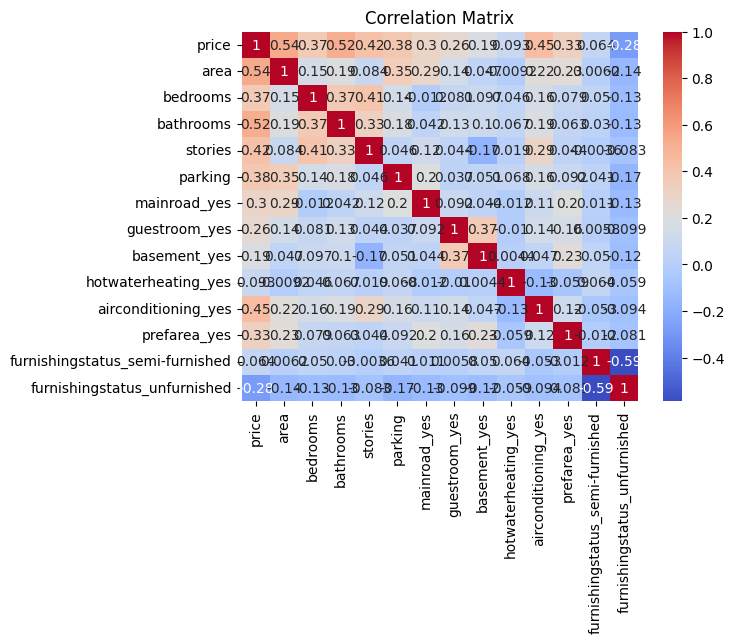

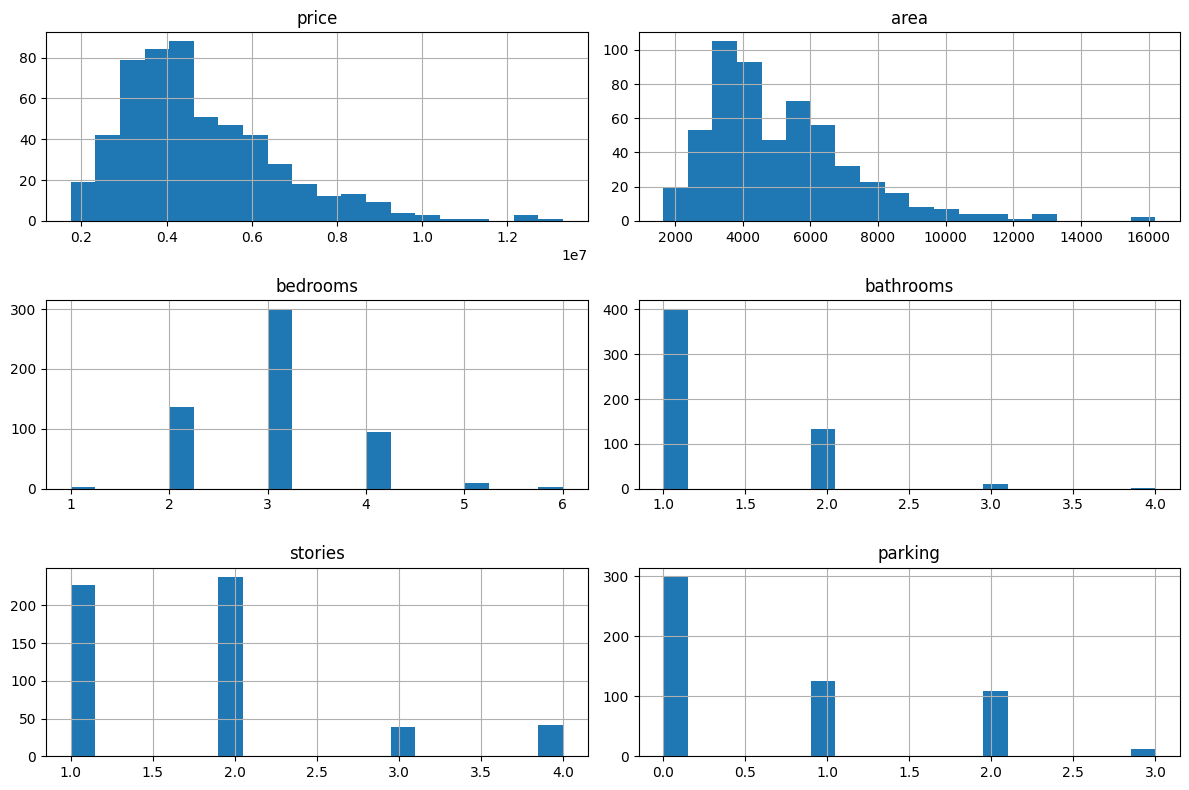

Lasso Regression MAE: 970043.4468078152
Lasso Regression MSE: 1754318945367.533
Lasso Regression R^2: 0.6529242131651091
Polynomial Regression MAE: 1052393.8426486002
Polynomial Regression MSE: 1942681115476.2932
Polynomial Regression R^2: 0.615658498984083
SVR MAE: 1762566.323066282
SVR MSE: 5563002976622.307
SVR R^2: -0.1005887158515093
K-means Silhouette Score: 0.6102712759511866


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.335e+14, tolerance: 1.344e+11
  model = cd_fast.enet_coordinate_descent(


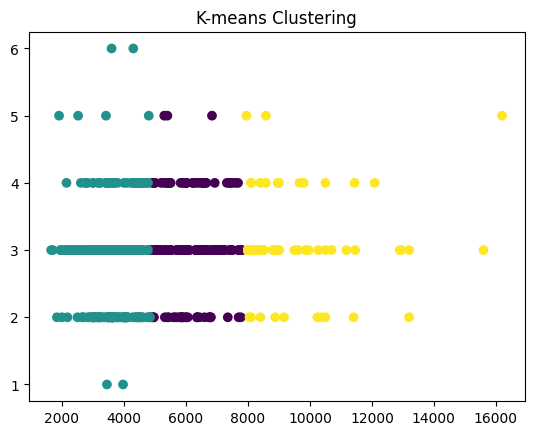

DBSCAN could not identify more than one cluster with the current parameters.


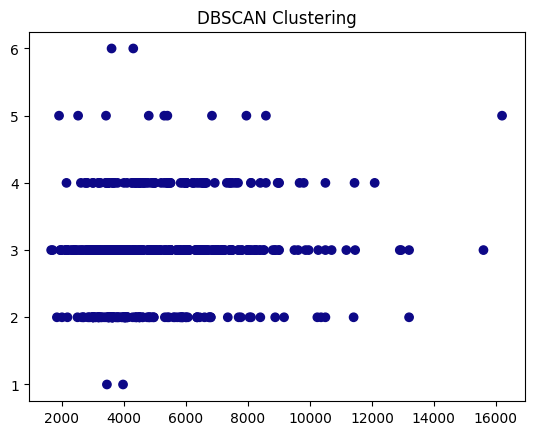

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, silhouette_score
from sklearn.pipeline import make_pipeline

# Load dataset
data = pd.read_csv('Housing.csv')

# Step 1: EDA
# 1.1 Inspect the data
print(data.head())
print(data.info())
print(data.describe())

# 1.2 Check for missing values
print("Missing values:\n", data.isnull().sum())

data=pd.get_dummies(data,drop_first=True)

# 1.3 Visualize correlations and distributions
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Visualize distributions of numerical features
data.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Step 2: Feature Selection and Engineering
# Separate features and target variable
X = data.drop('price', axis=1)  # Assuming 'price' is the target
y = data['price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Implementations and Evaluations

# 3.1 Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluation for Lasso Regression
print("Lasso Regression MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression R^2:", r2_score(y_test, y_pred_lasso))

# 3.2 Polynomial Regression (using degree 2 for example)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

lasso_poly = Lasso(alpha=0.1)
lasso_poly.fit(X_train_poly, y_train)
y_pred_poly = lasso_poly.predict(X_test_poly)

# Evaluation for Polynomial Regression
print("Polynomial Regression MAE:", mean_absolute_error(y_test, y_pred_poly))
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))
print("Polynomial Regression R^2:", r2_score(y_test, y_pred_poly))

# 3.3 Support Vector Regression (using RBF kernel)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

# Evaluation for SVR
print("SVR MAE:", mean_absolute_error(y_test, y_pred_svr))
print("SVR MSE:", mean_squared_error(y_test, y_pred_svr))
print("SVR R^2:", r2_score(y_test, y_pred_svr))

# 3.4 K-means Clustering (Using 3 clusters as example)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Evaluate K-means
print("K-means Silhouette Score:", silhouette_score(X, kmeans_labels))

# Visualize K-means clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.show()

# # 3.5 DBSCAN Clustering
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan_labels = dbscan.fit_predict(X)

# # Evaluate DBSCAN
# print("DBSCAN Silhouette Score:", silhouette_score(X, dbscan_labels))

# # Visualize DBSCAN clusters
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels, cmap='plasma')
# plt.title("DBSCAN Clustering")
# plt.show()



# 3.5 DBSCAN Clustering
dbscan = DBSCAN(eps=.5, min_samples=3)  # Adjusted parameters for DBSCAN
dbscan_labels = dbscan.fit_predict(X)

# Check if more than one cluster was found
if len(set(dbscan_labels)) > 1:
    # Evaluate DBSCAN with silhouette score if more than one cluster
    print("DBSCAN Silhouette Score:", silhouette_score(X, dbscan_labels))
else:
    print("DBSCAN could not identify more than one cluster with the current parameters.")

# Visualize DBSCAN clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()
